In [13]:
# Some standard import statements that are nice for Jupyter

import sys
import os
import logging

import numpy as np

from scipy.optimize import curve_fit

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 200

import time

import json

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

# importing my model functions for analysis
from psi_transmission.model import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Proton Beam Fluctuations

This data is coming from Edgard, somehow he had access to higher frequency current readings than what Bernhard had on file at PSI. We expect to see large fluctuations corresponding to where we have missing runs in the data that Edgard had pre-processed. The plot from his slides is shown below:

![](../misc/p_beam_fluctuate.png)
![](jonahberean/psi_transmission/misc/p_beam_fluctuate.png)

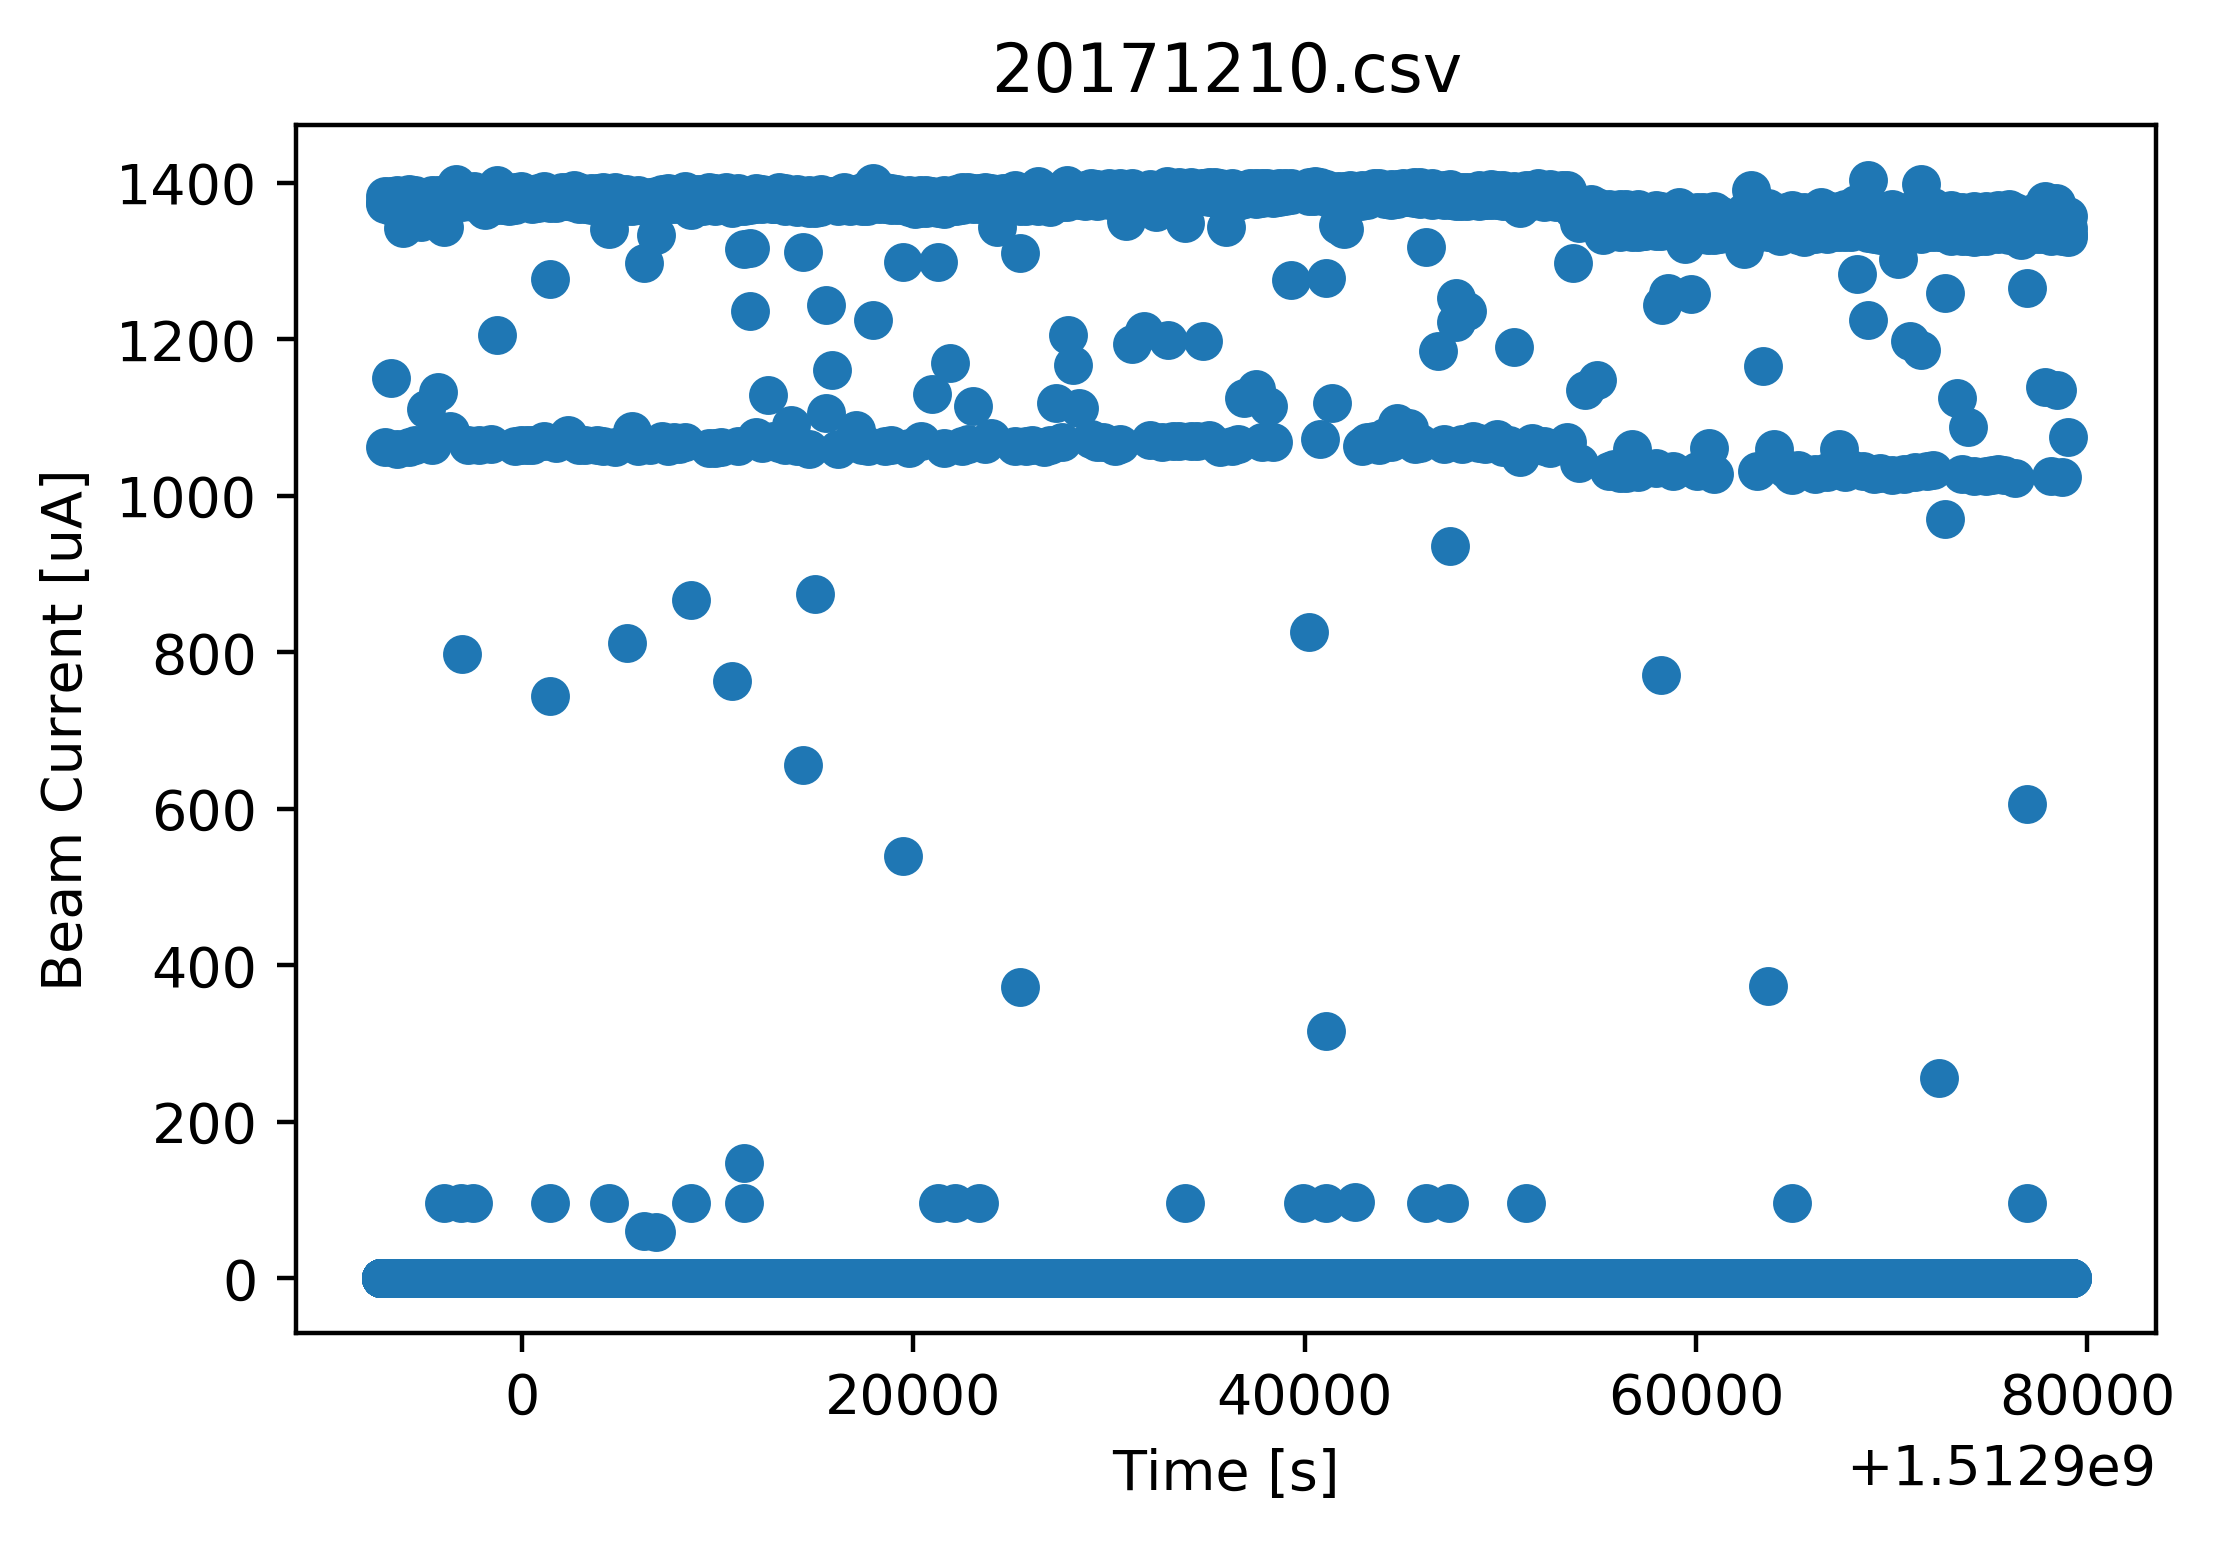

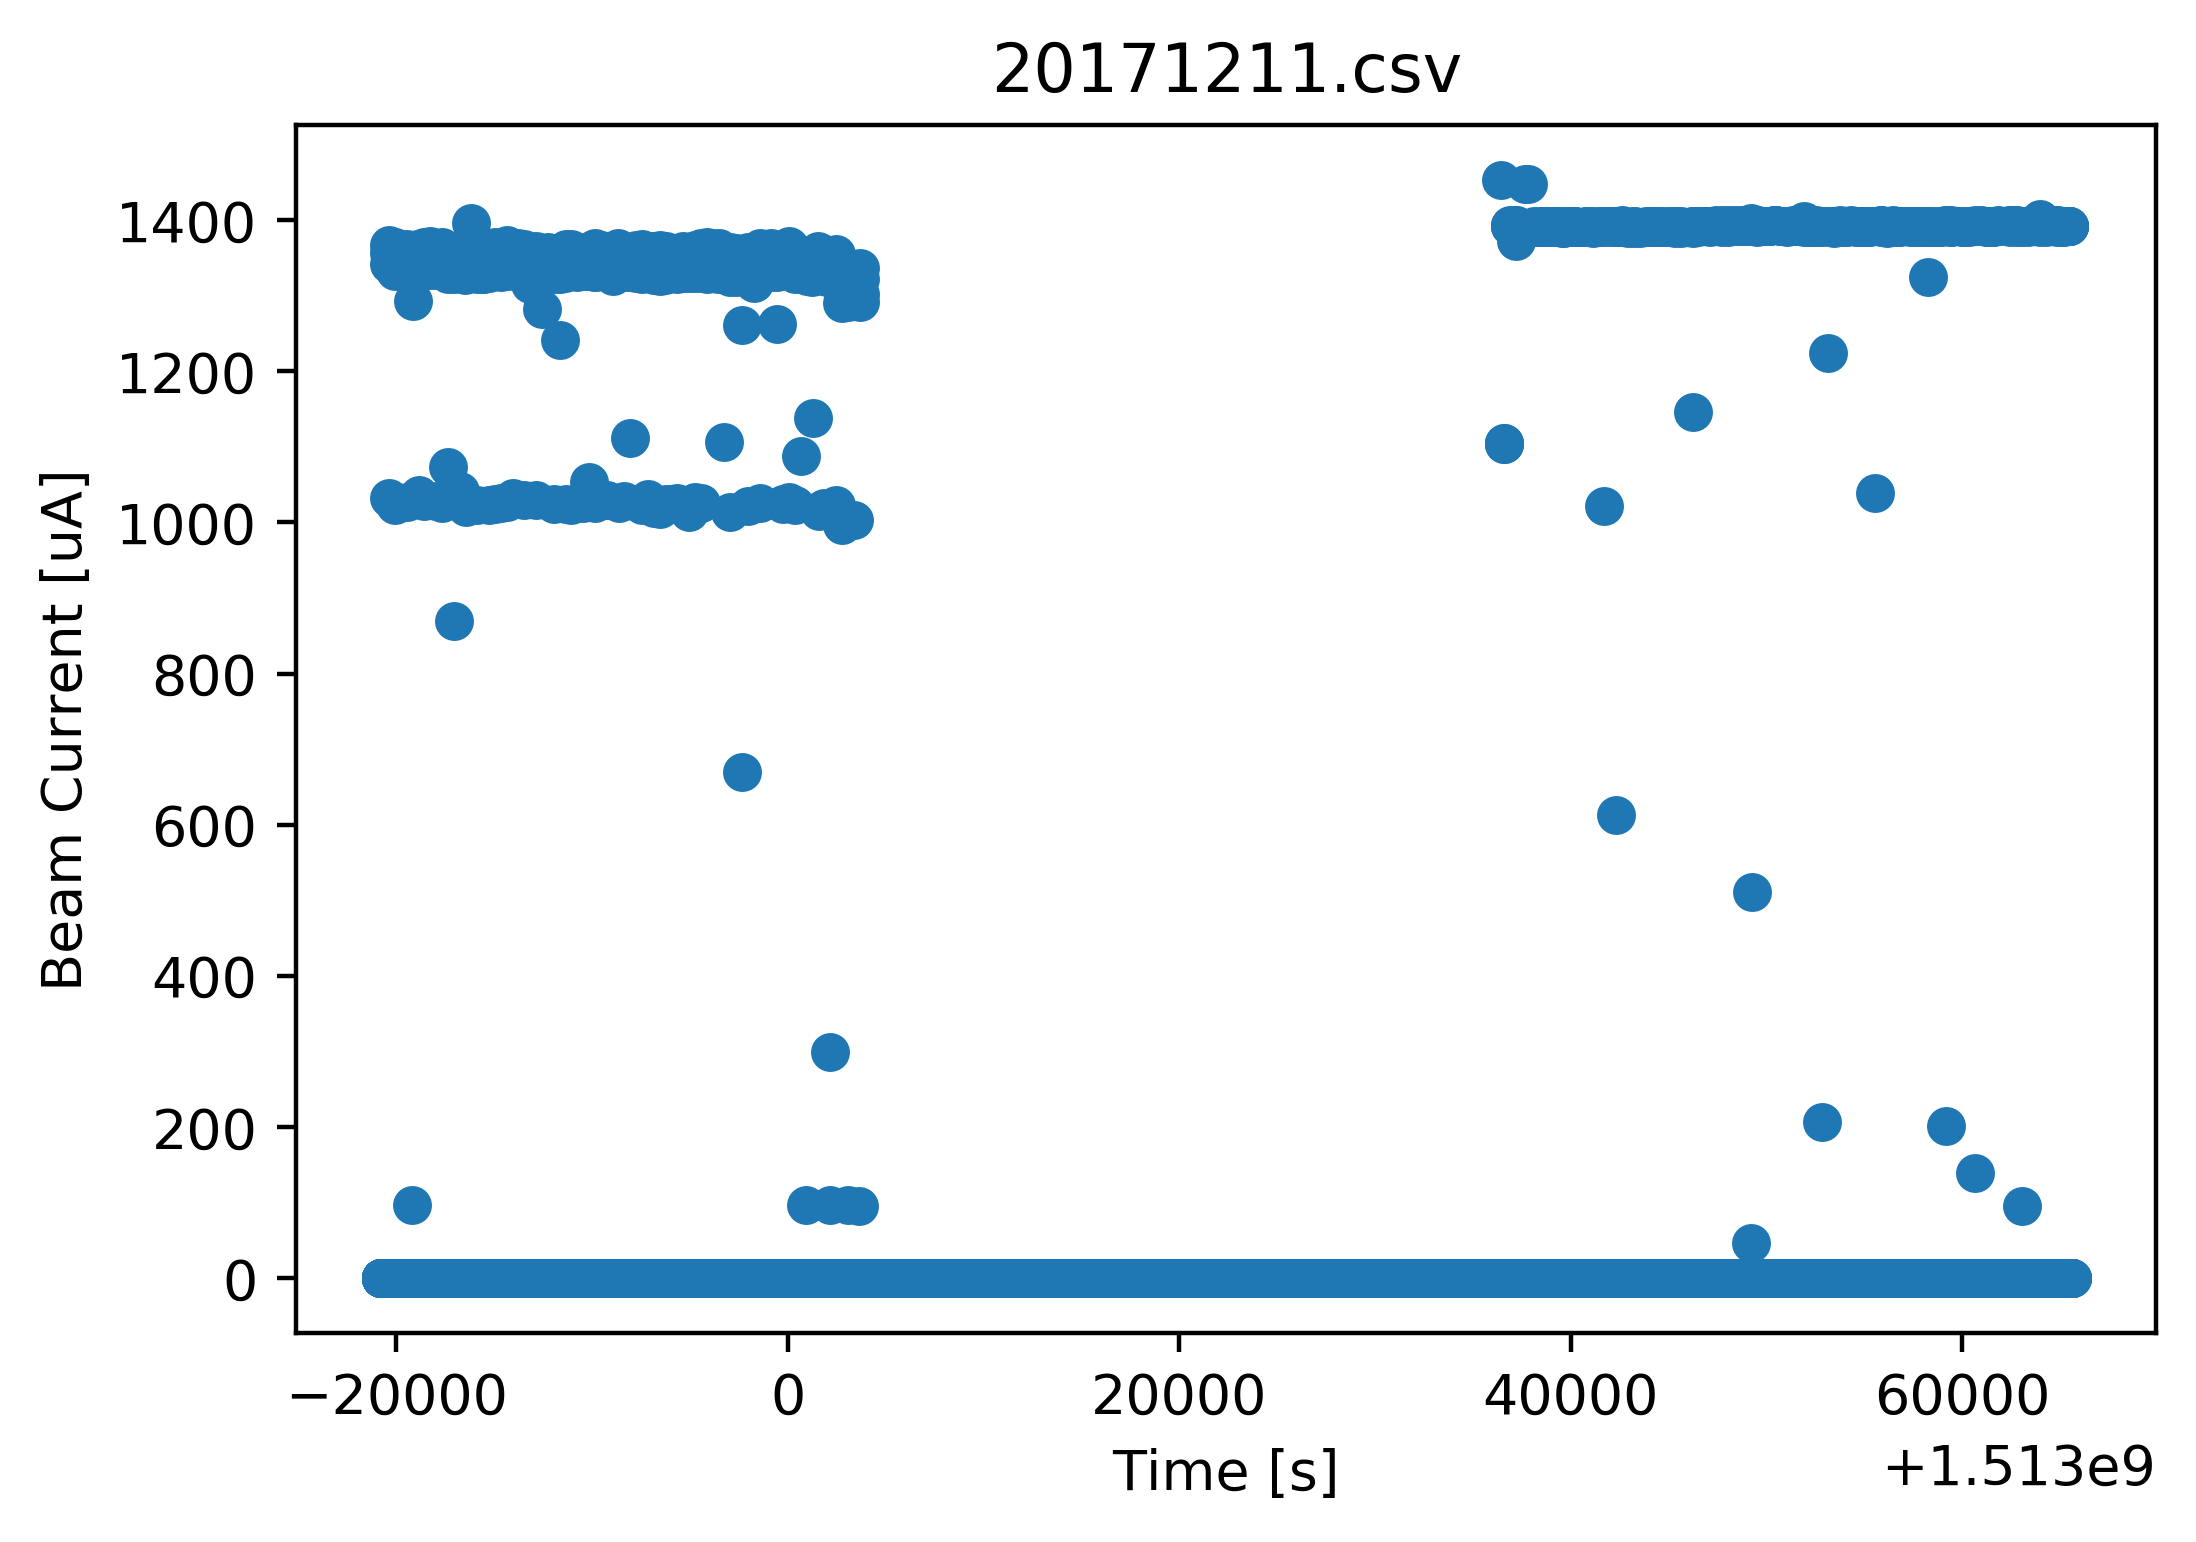

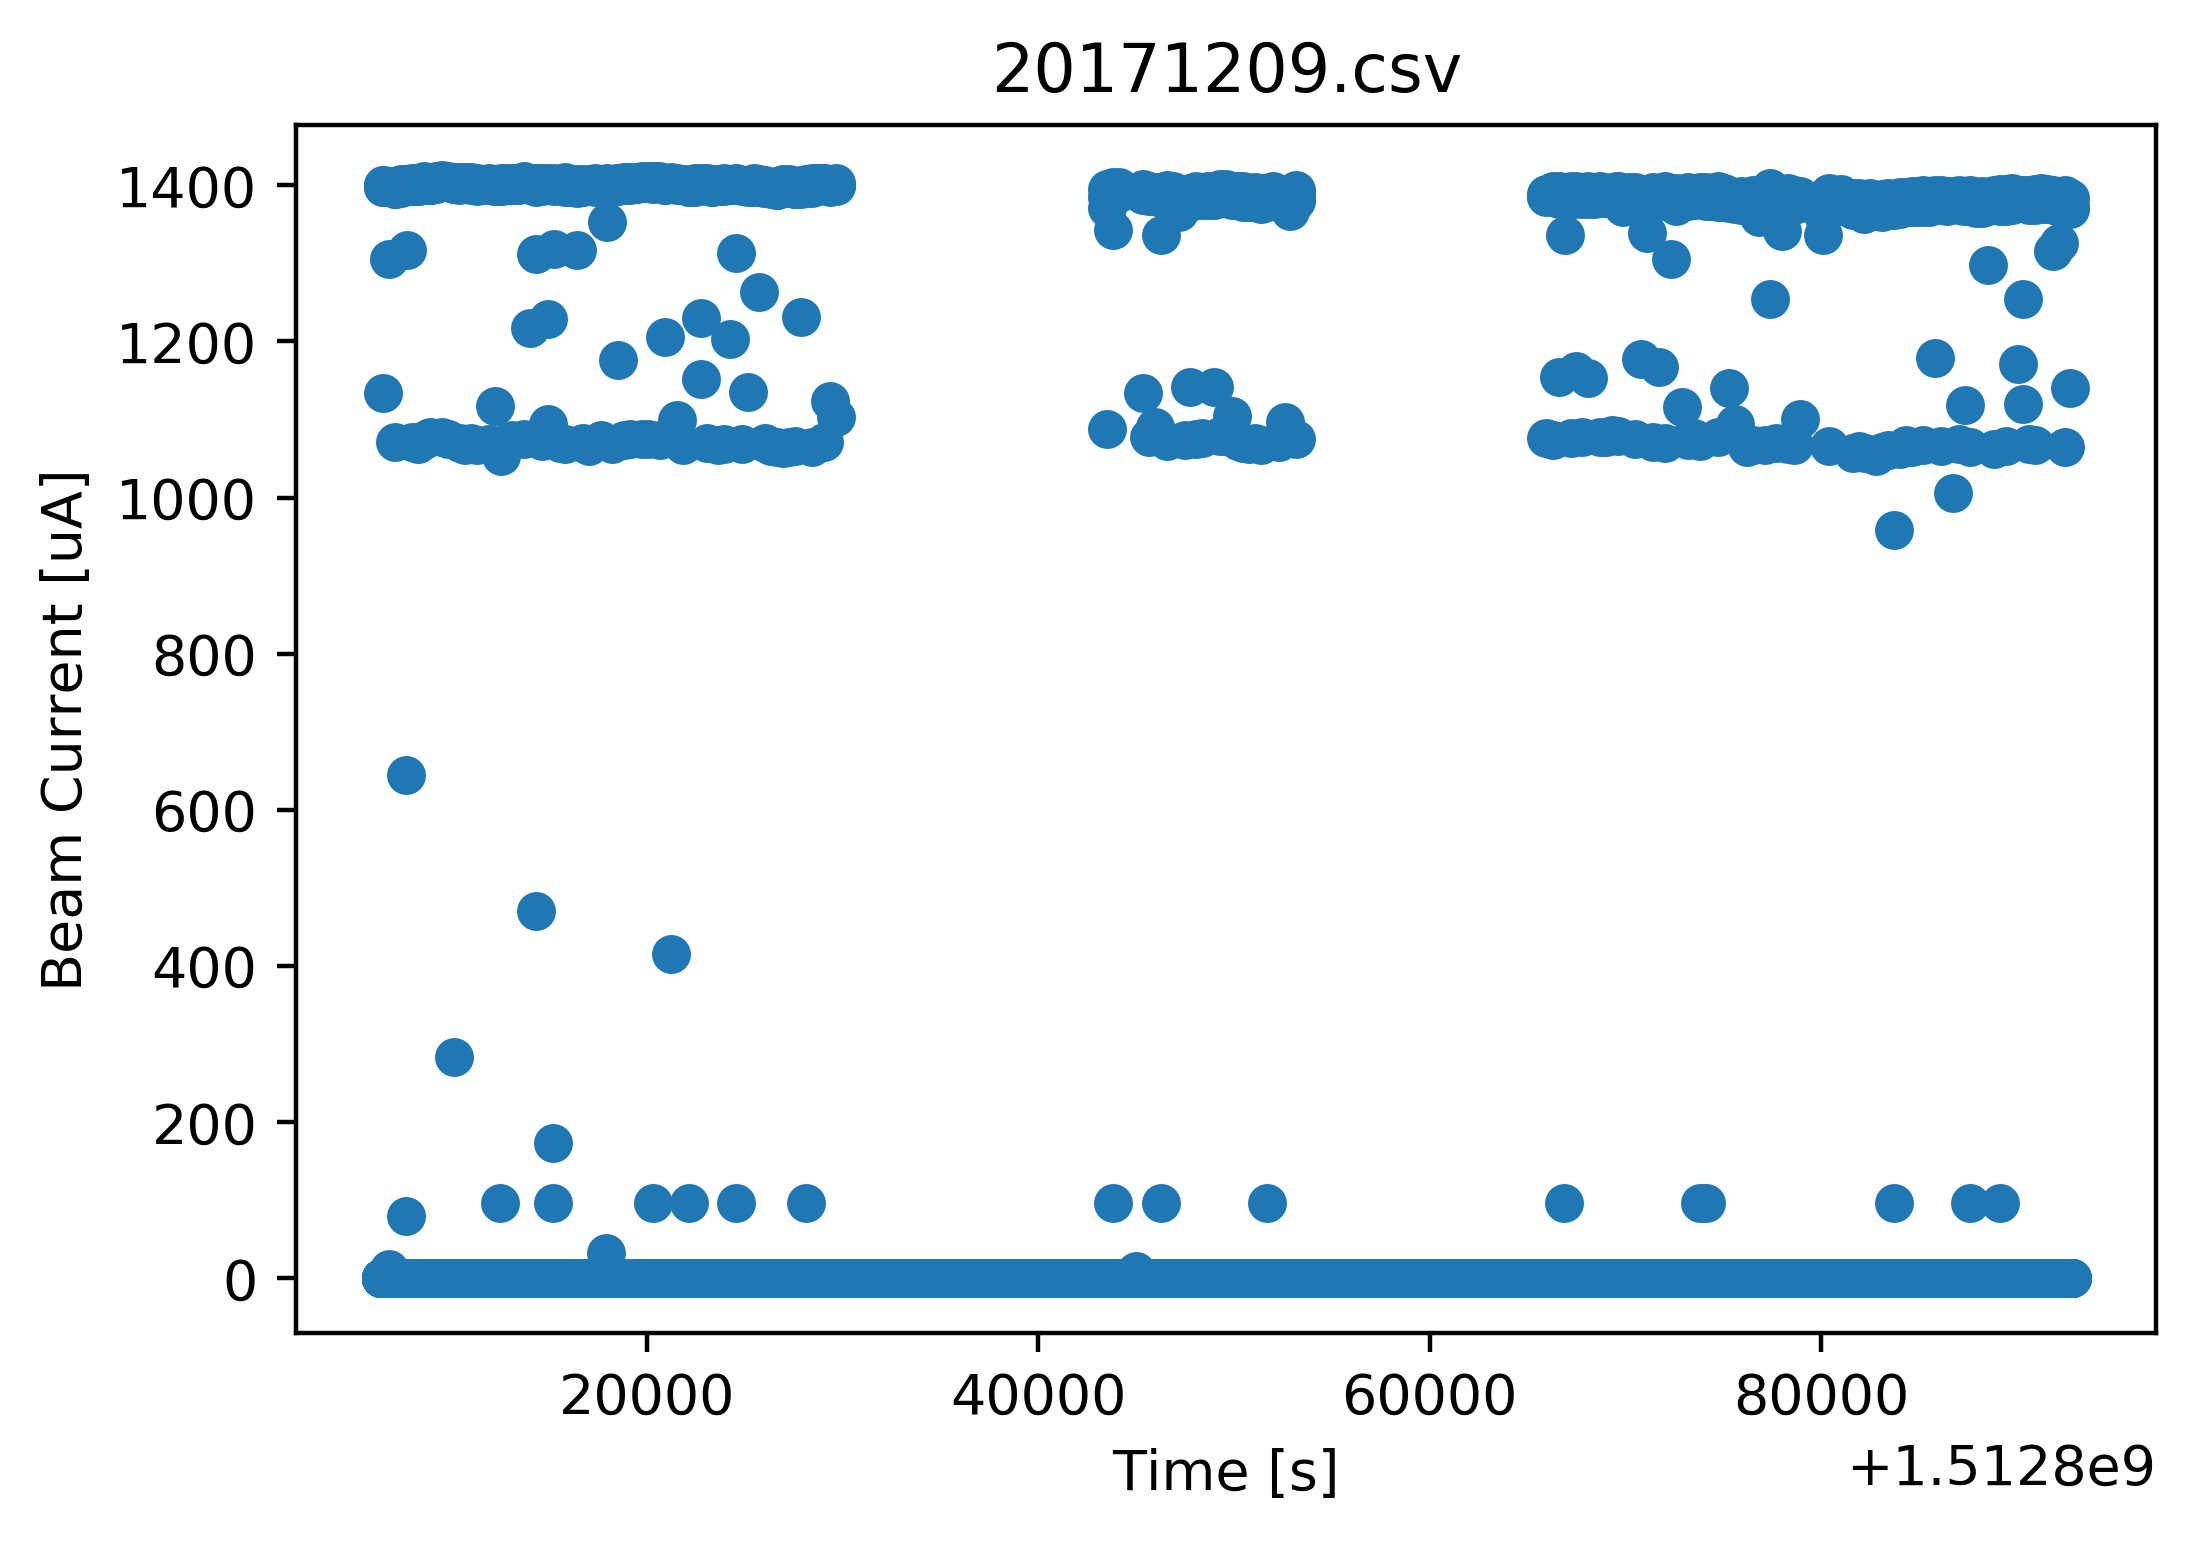

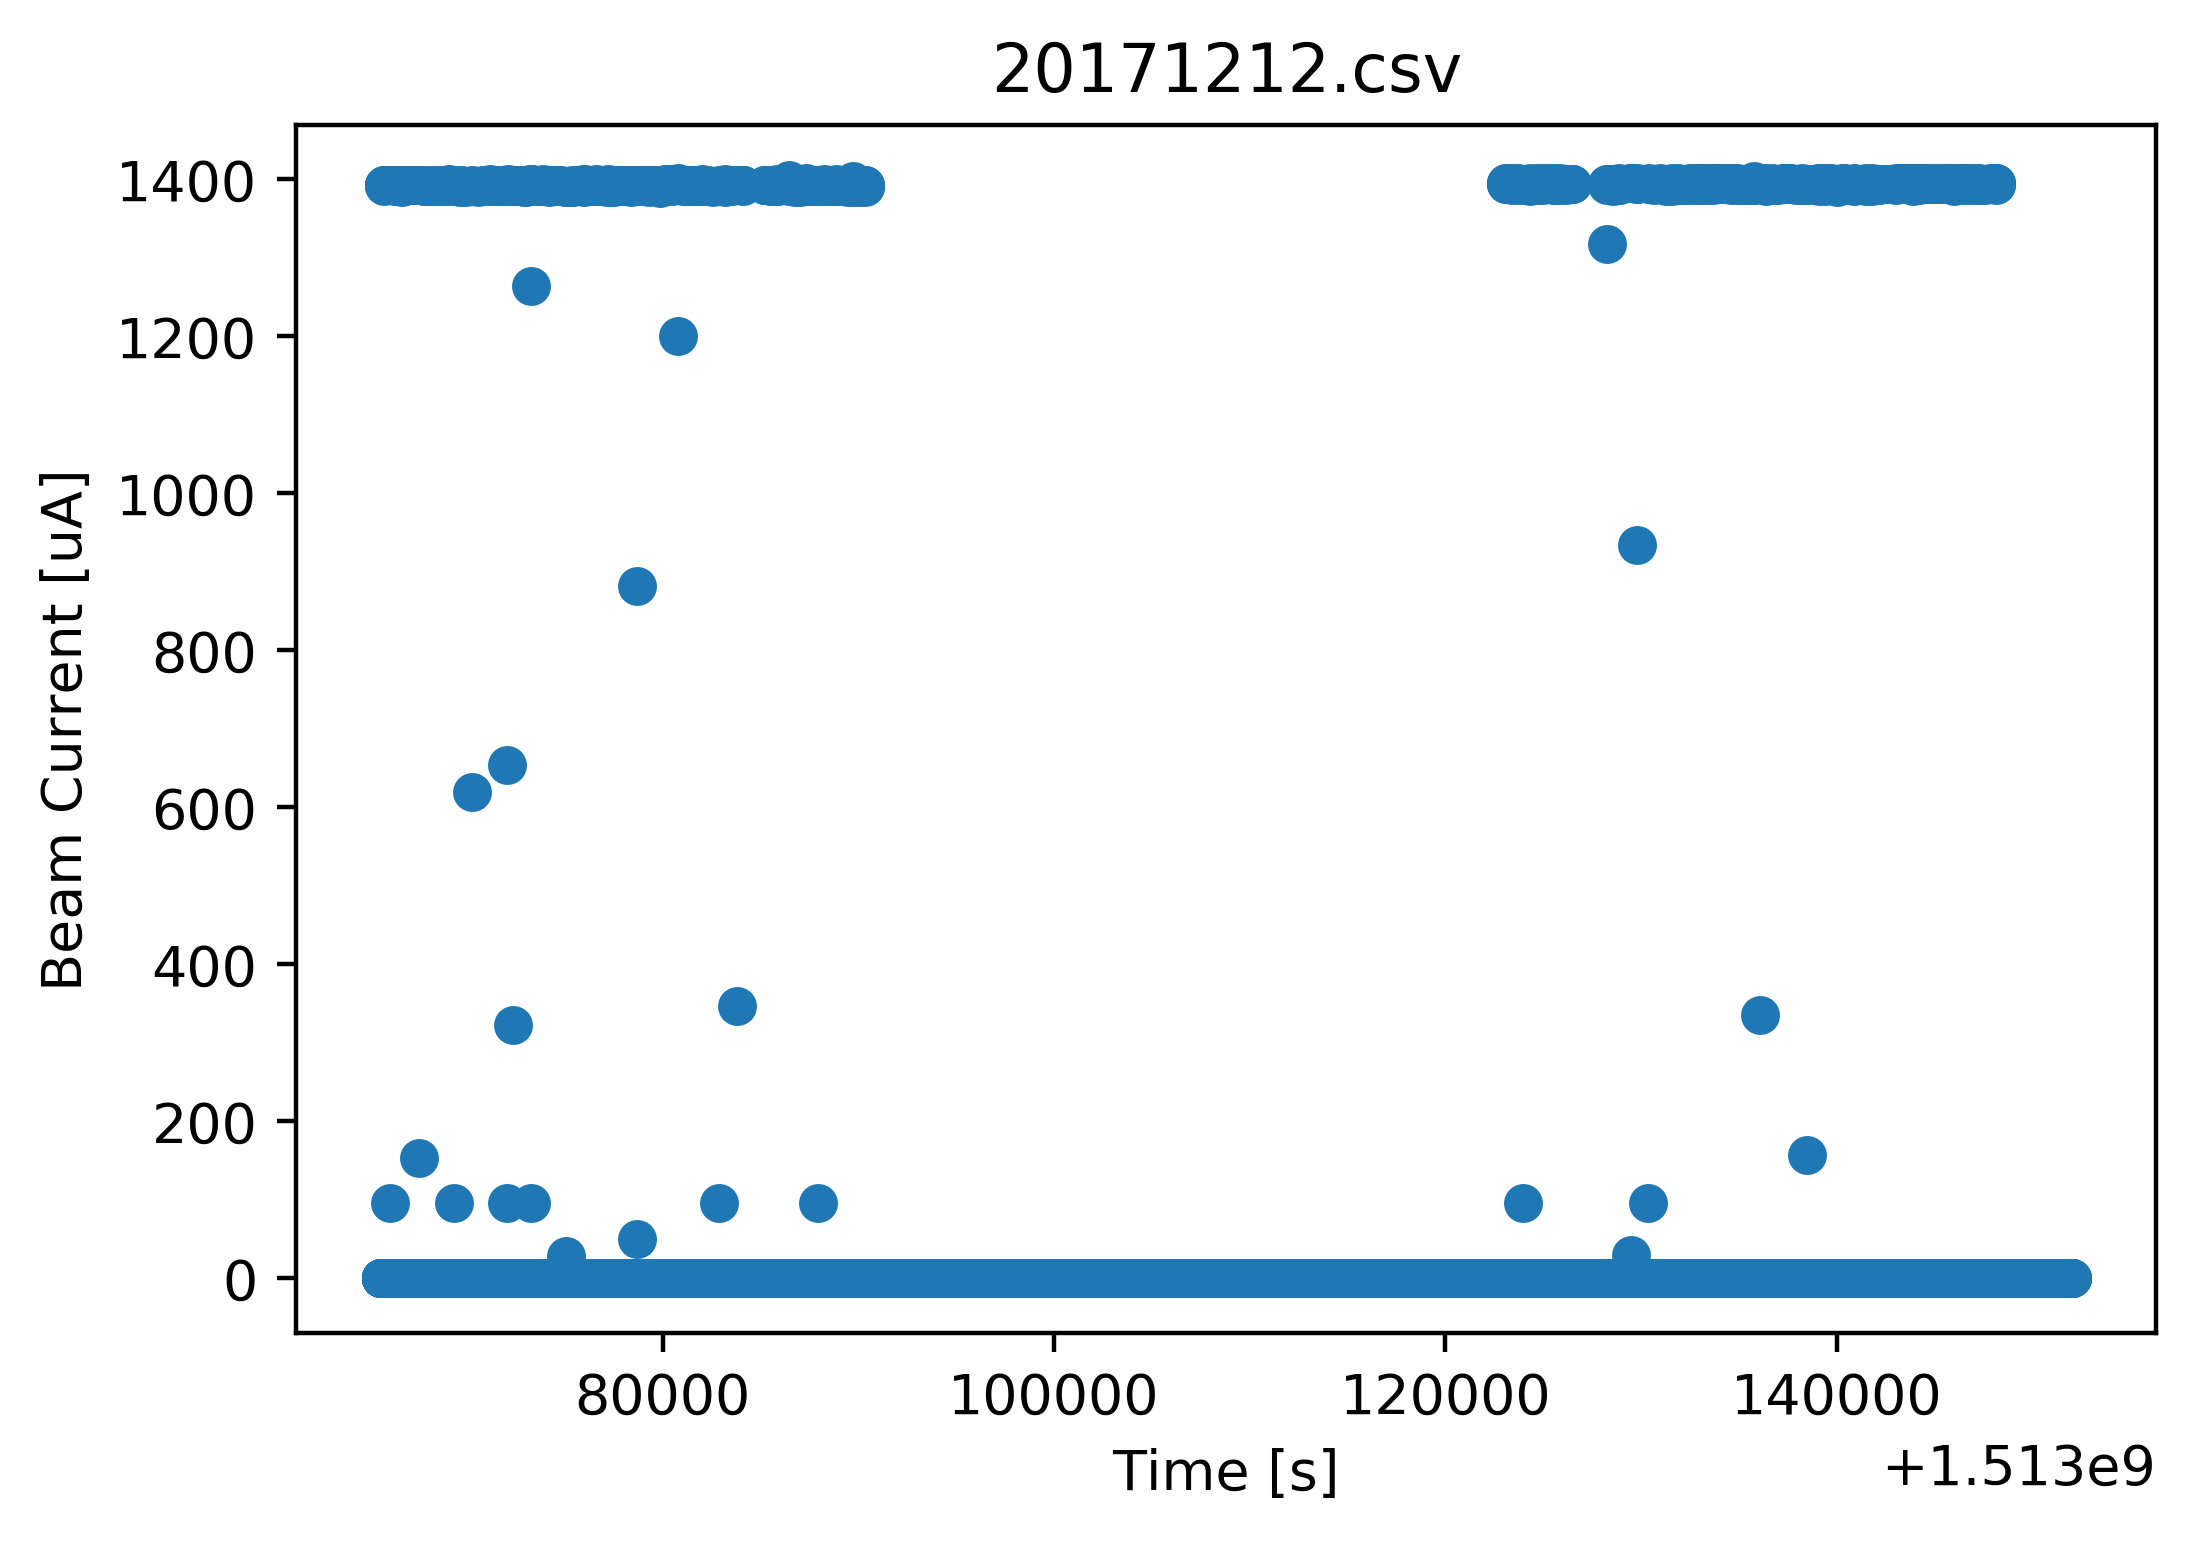

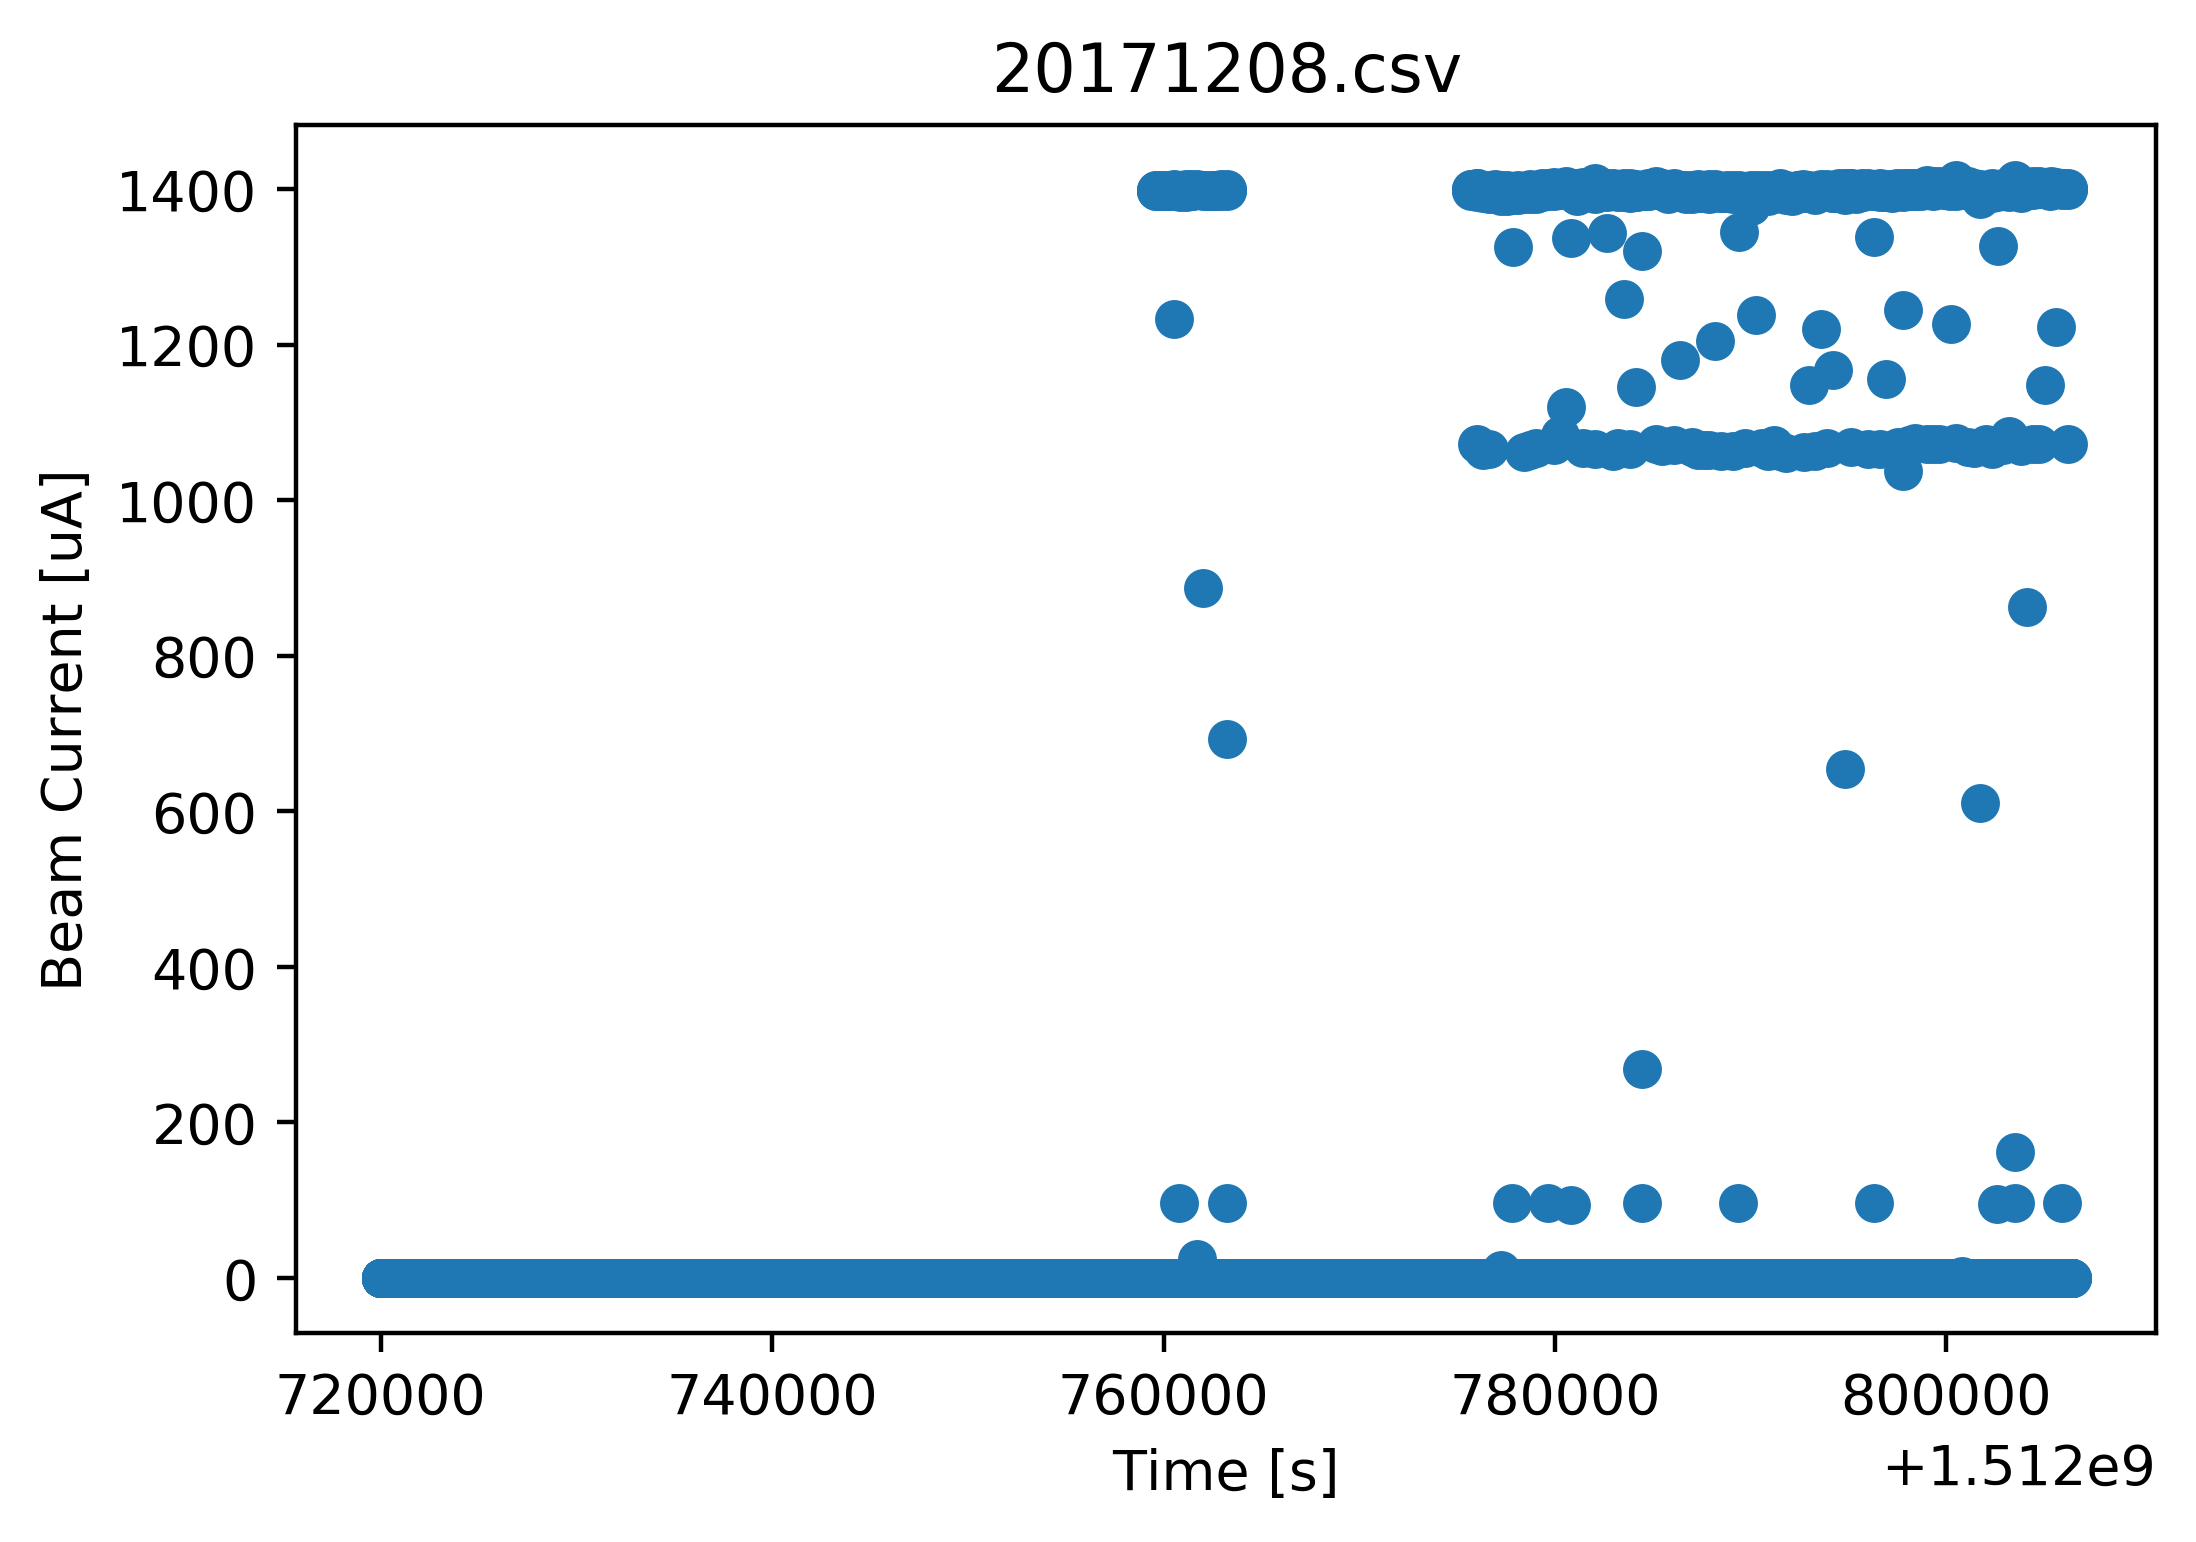

In [21]:
# Some of this is half finished because I realized that Bernhard's data has 0.1 Hz 
# frequency whereas Edgard's is 0.5 Hz. I'm not sure how that happens, but I begin 
# looking at Edgard's exclusively in a separate notebook.

# retrieve the epoch time stamp of the beginning of the experiment
exp_start_time = get_first_run_time()

for filename in os.listdir('../data_p_beam_from_edgard'):
    
    data = np.loadtxt('../data_p_beam_from_edgard/' + filename, delimiter = '\t', usecols=(2));

    # generate an array of time stamps with reference to experiment start time
    # initialize an empty array to hold time data
    time_vector = np.zeros((np.shape(data)))

    # open and get the lines of the data file as strings
    f = open('../data_p_beam_from_edgard/' + filename)  
    lines = f.readlines()
    f.close()

    # loop through and get each time stamp
    for i in range(0, np.shape(data)[0]):

        # get time_stamp from lines
        date_time = lines[i][8:10] + '.' + lines[i][5:7] + '.' + lines[i][0:4] +  ' ' + lines[i][11:19]
        pattern = '%d.%m.%Y %H:%M:%S'
        time_stamp = int(time.mktime(time.strptime(date_time, pattern)))
        time_vector[i] = time_stamp

    plt.clf()
    plt.scatter(time_vector, data);
    plt.xlabel('Time [s]');
    plt.ylabel('Beam Current [uA]');
    plt.title(filename)
#     plt.ylim([1,1405])
    plt.show()

How could we cross-analyze this data with the run data from Edgard or Bernhard? We would look at smaller sections of the data, where we have valid runs, and look at the stability of the cyclotron in those regions. Edgard's trimming appears to match the posts in the elog. We wouldn't be adding new runs that aren't in the elog, so this will really just be a confirmation that there are no further runs that we think ought to be discarded. We also may find that the cyclotron beam current data is of some use for normalization. 